# Title

# Goal

# Exec Sum

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# py modules
import acquire as a
import explore as e
import visual as viz
import model as m

from math import sqrt

# hypothesis testing
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

seed = 21

# Acquired

In [2]:
# Acquire Data
df = a.get_wine()

# Add Exploration columns
df = e.add_exploration_columns(df)
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_red,acid_alc_sugar,acid_chlor
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0.172429,56.518519
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,0.416817,47.210884
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0.344314,58.533333


# Prepare

In [3]:
# Split Data
train, X_train, y_train, X_val, y_val, X_test, y_test = e.split_data(df,'quality')

# Scale Data
X_train_s,X_val_s,X_test_s = e.scale_minmax(X_train,X_val,X_test)

# Append scaled density column to train
train['density_scaled'] = X_train_s['density']

# Dropping infinite values
X_train_s, X_val_s, X_test_s, y_train, y_val, y_test =\
m.drop_infinite(X_train_s, X_val_s, X_test_s, y_train, y_val, y_test)


In [4]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3637, 14), (1560, 14), (1300, 14), (3636, 1), (1560, 1), (1300, 1))

In [5]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color_red,acid_alc_sugar,acid_chlor
540,0.239669,0.153333,0.252033,0.141321,0.051495,0.031250,0.389401,0.157895,0.672727,0.173410,0.492754,0.0,0.160992,0.270808
72,0.181818,0.126667,0.227642,0.062980,0.089701,0.104167,0.449309,0.179102,0.881818,0.265896,0.289855,0.0,0.232452,0.143777
1389,0.355372,0.073333,0.325203,0.003072,0.046512,0.250000,0.400922,0.105842,0.309091,0.052023,0.289855,0.0,0.488712,0.354172
3657,0.157025,0.046667,0.382114,0.164363,0.043189,0.166667,0.281106,0.143628,0.281818,0.052023,0.362319,0.0,0.121198,0.266904
860,0.355372,0.126667,0.284553,0.015361,0.034884,0.128472,0.223502,0.104878,0.454545,0.219653,0.347826,0.0,0.433378,0.443864


# Explore

Questions: 
1. The proportion of acid to (alcohol + sugar) affects quality.
2. White and red wines’ quality is different
3. The proportion of acid to chlorides affects quality
4. Density affects the quality of wine

In [6]:
# Creating Cluster column
X_train_s, X_val_s, X_test_s = e.cluster_Xsets(X_train_s, X_val_s, X_test_s, ['alcohol','volatile_acidity','density','chlorides'])

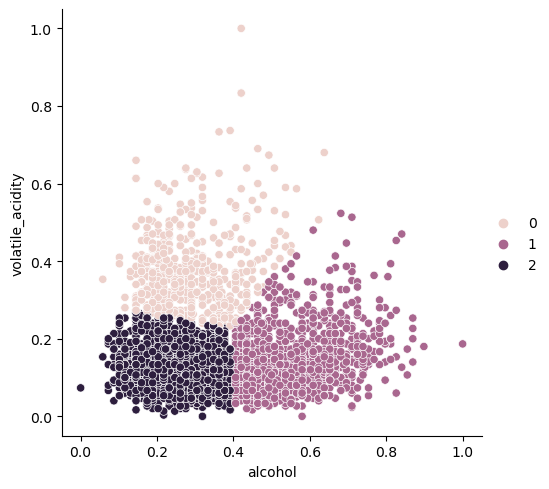

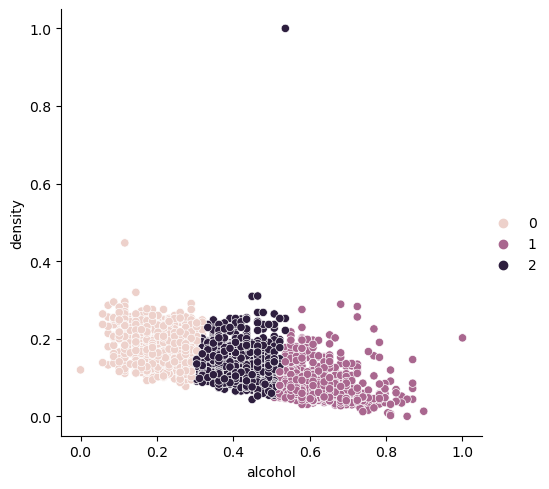

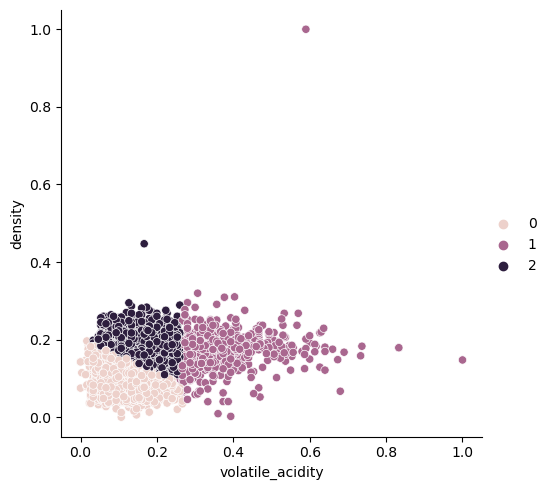

In [7]:
e.plot_clusters(X_train_s,'alcohol','volatile_acidity','density')

# Q1. The proportion of acid to (alcohol + sugar) affects quality.

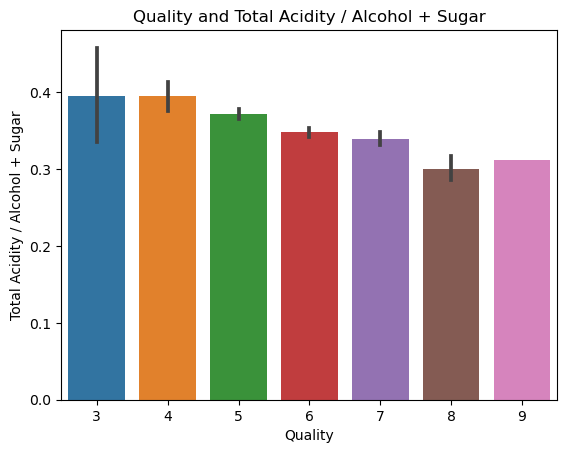

In [8]:
viz.barplot1(train)

### Takeaways:The higher the proportion of total acidity to alcohol and suger, the lower the quality

## Stats Test

# Q2. White and red wines’ quality is different

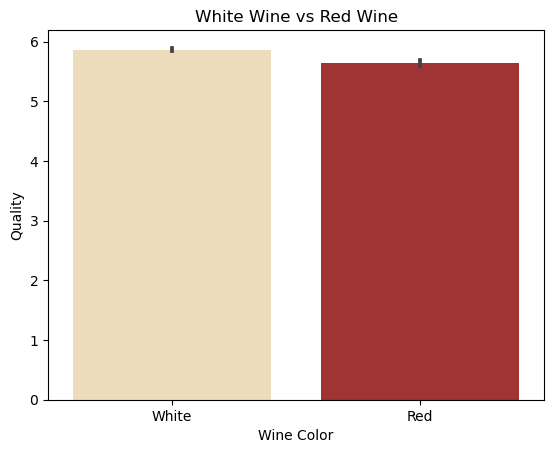

In [9]:
viz.barplot2(train)

### Takeaways: White wine, on average, is of higher quality than red wine.

## Stats Test

# Q3. The proportion of acid to chlorides affects quality

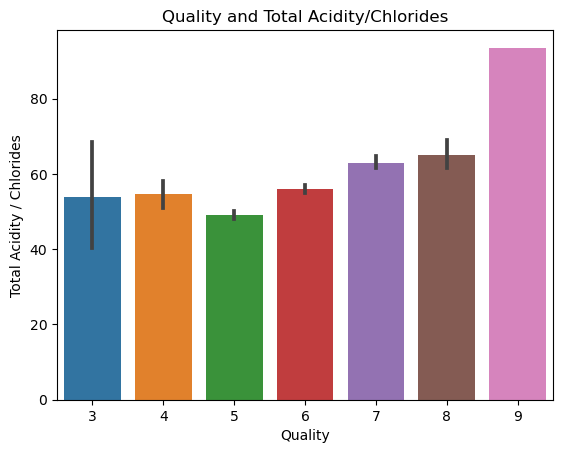

In [10]:
viz.barplot3(train)

### Takeaways: the higher the proportion of total acidity and chlorides, the higher the quality.

## Stats Test

# Q4. Density affects the quality of wine

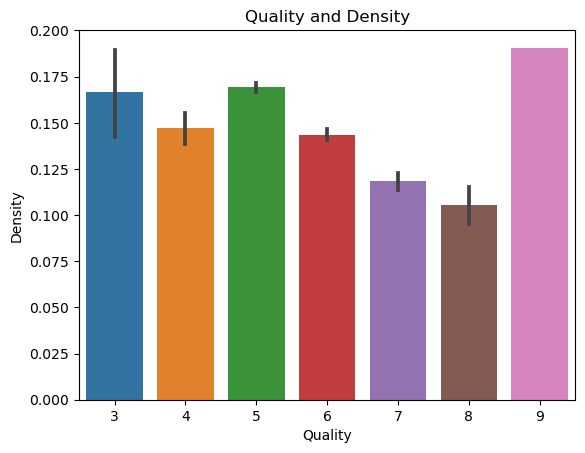

In [11]:
viz.barplot4(train)

### Takeaways: Except for a quality of 9, the higher the density, the lower the quality.

## Stats Test

## Explore Summary

# Modeling

In [12]:
m.run_models(X_train_s, X_val_s, X_test_s, y_train, y_val, 'quality').sort_values('rmse_val')

,model,rmse_train,rmse_val,difference
5,lm_pf2,0.673423,0.705714,-0.032291
1,lm,0.730137,0.737724,-0.007588
12,tweedie1_pf3,0.762162,0.773458,-0.011296
8,tweedie1_pf2,0.781720,0.794573,-0.012853
11,tweedie0_pf3,0.804033,0.817332,-0.013300
7,tweedie0_pf2,0.835127,0.848596,-0.013469
4,tweedie1,0.834235,0.848785,-0.014549
3,tweedie0,0.865285,0.880974,-0.015689
0,baseline,0.867745,0.883757,-0.016012
2,lass,0.867745,0.883757,-0.016012
